<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Домашняя-работа-3" data-toc-modified-id="Домашняя-работа-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа 3</a></span><ul class="toc-item"><li><span><a href="#Математическая-оптимизация" data-toc-modified-id="Математическая-оптимизация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Математическая оптимизация</a></span><ul class="toc-item"><li><span><a href="#Вам-дана-функция-$y(x)-=-x^{3}-\ln(x)$" data-toc-modified-id="Вам-дана-функция-$y(x)-=-x^{3}-\ln(x)$-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Вам дана функция $y(x) = x^{3} \ln(x)$</a></span></li></ul></li></ul></li></ul></div>

# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

    $y'(x) = 3x^{2}
 log(x)+x^{2}$

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# Our function
def f(x):
    return x**3 * np.log(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


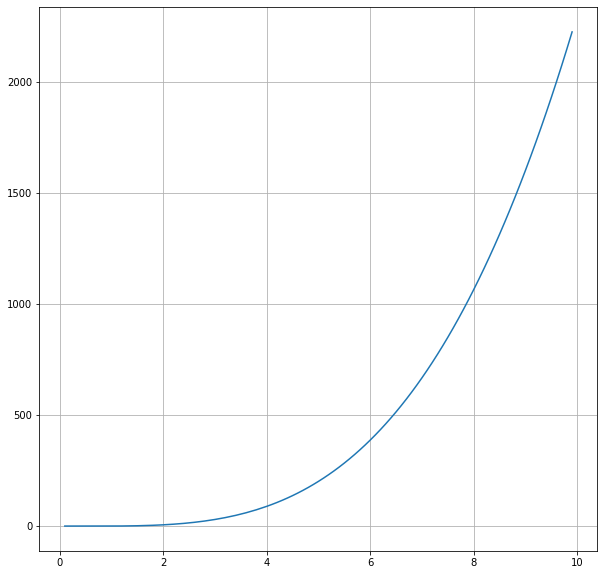

<Figure size 1080x576 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()    # Создание окна и осей для графика
ax.grid(True)   # отображение сетки на графике
plt.figure(figsize=(15, 8))

x_plt = np.arange(-10, 10, 0.1)
f_plt = [f(x) for x in x_plt]

ax.plot(x_plt, f_plt)                   # отображение функции
#point = ax.scatter(point, f(point), c='red')  # отображение точки красным цветом


In [ ]:
# df from f
def df(x):
    return 3*(x**2) * np.log(x) + x**2

In [ ]:
df(3)

38.66253179403897

3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

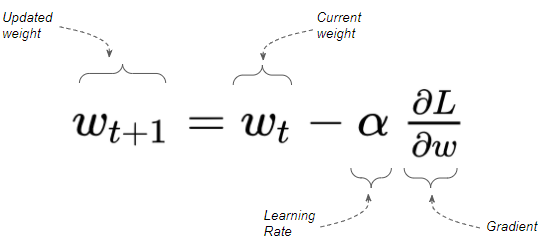

In [ ]:
def get_min_with_gd(x0, step_count, lr, thershold):
    cur_x = x0 # The algorithm starts at x0
    thershold = thershold #This tells us when to stop the algorithm
    lr = lr # Learning rate
    step_count = step_count  # maximum number of iterations
    previous_step_size = 1 #
    iters = 1 #iteration counter
    cur_history = np.array([])

    while previous_step_size > thershold and iters < step_count:
       prev_x = cur_x #Store current x value in prev_x
       cur_x = cur_x - lr * df(prev_x) #Grad descent
       previous_step_size = abs(cur_x - prev_x) #Change in x
       cur_history = np.append(cur_history, cur_x)
       iters = iters + 1  #iteration count      
    return cur_history

In [ ]:
# Запустите поиск минимума с любой точки, например с точки 10
point = 10
step_count = 300

history = get_min_with_gd(point, step_count, 0.01, 0.000001)
history 

array([2.09224472, 1.95152107, 1.8370461 , 1.7417274 , 1.66089274,
       1.59131992, 1.5307045 , 1.47734879, 1.42997094, 1.38758265,
       1.34940824, 1.31482932, 1.28334623, 1.25455026, 1.22810359,
       1.20372422, 1.18117474, 1.16025372, 1.14078896, 1.12263235,
       1.1056557 , 1.08974745, 1.07481   , 1.06075758, 1.04751446,
       1.03501351, 1.02319498, 1.01200552, 1.0013973 , 0.99132732,
       0.98175683, 0.97265074, 0.96397727, 0.95570751, 0.94781511,
       0.94027602, 0.9330682 , 0.92617144, 0.91956719, 0.91323832,
       0.90716906, 0.90134484, 0.89575214, 0.89037845, 0.88521215,
       0.88024243, 0.87545922, 0.87085314, 0.86641541, 0.86213786,
       0.85801279, 0.85403304, 0.85019184, 0.84648288, 0.84290018,
       0.83943815, 0.83609151, 0.83285527, 0.82972474, 0.82669548,
       0.82376329, 0.8209242 , 0.81817444, 0.81551045, 0.81292885,
       0.81042643, 0.80800014, 0.80564708, 0.8033645 , 0.80114976,
       0.79900038, 0.79691397, 0.79488825, 0.79292107, 0.79101

4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

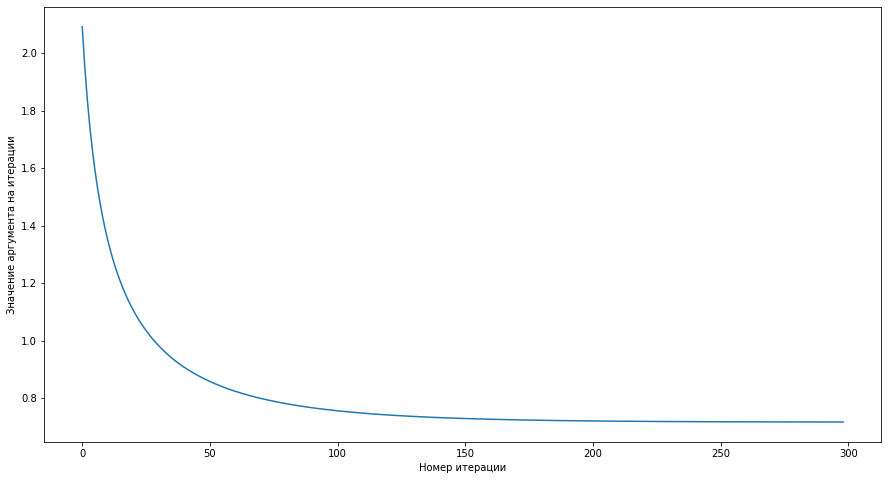

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [ ]:
def get_min_with_rmsprop(x0, step_count=99, lr=0.1, betta=0.9, thershold=0.000001, epsilon=1e-6):
    
    thershold = thershold
    cur_x = x0 # The algorithm starts at x0
    s = 0
    step_count = step_count  # maximum number of iterations
    previous_step_size = 1 #
    iters = 1 #iteration counter
    cur_history = np.array([])

    while previous_step_size > thershold and iters < step_count:
       prev_x = cur_x #Store current x value in prev_x
       
       s = betta * s + (1 - betta) * (df(prev_x)) **  2
       cur_x = cur_x - (lr / (np.sqrt(s + epsilon))) * df(prev_x)
          
       previous_step_size = abs(cur_x - prev_x) #Change in x
       cur_history = np.append(cur_history,cur_x)
       iters = iters + 1  #iteration count      
    return cur_history
   

In [ ]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2

history_rmsprop_1 = get_min_with_rmsprop(0)
history_rmsprop_2 = get_min_with_rmsprop(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
history_rmsprop_2

array([1.68377224, 1.51678195, 1.40023054, 1.31053438, 1.23789152,
       1.17717641, 1.12533557, 1.08038882, 1.04097271, 1.00610558,
       0.9750557 , 0.94726229, 0.92228564, 0.89977426, 0.87944243,
       0.8610545 , 0.8444135 , 0.82935273, 0.81572946, 0.80342009,
       0.79231637, 0.78232239, 0.77335224, 0.76532805, 0.75817841,
       0.75183715, 0.74624224, 0.74133503, 0.73705954, 0.73336204,
       0.73019069, 0.72749534, 0.72522748, 0.72334031, 0.72178883,
       0.72053014, 0.71952365, 0.71873141, 0.71811843, 0.71765291,
       0.71730647, 0.71705428, 0.71687502, 0.71675088, 0.71666731,
       0.71661276, 0.71657832, 0.71655737, 0.71654513, 0.71653829,
       0.71653465, 0.71653281, 0.71653194])

6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

In [ ]:
from re import X
# поиск минимума функции в точке 2 с помощью функции optimize
from scipy import optimize

def f(x):
    return x**3 * np.log(x)

print(optimize.minimize(f, x0=2),'x =', min)

      fun: -0.12262648039043472
 hess_inv: array([[0.46343218]])
      jac: array([4.61004674e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([0.71653152]) x = 0.71653152


In [ ]:
def point_to_mass(array): # переведем наши точки в массив точик + результат функции
    temp_mass = []
    for i in range(len(array)):
      temp_mass.append([history_rmsprop_2[i],f(history_rmsprop_2[i])])
    return temp_mass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


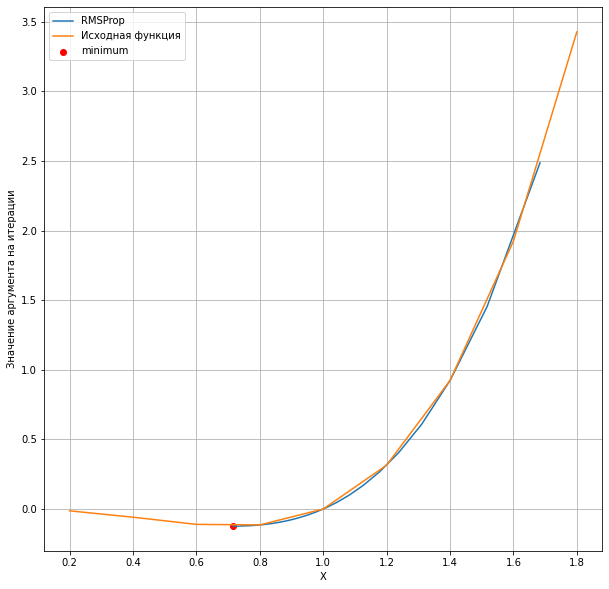

In [ ]:
plt.figure(figsize=(10, 10))

a = history_rmsprop_2.tolist()
min = 0.71653152
# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history_rmsprop_2,f(history_rmsprop_2))


point = plt.scatter(min, f(min), c='red')  # отображение минимума красным цветом

# Отрисуем то, как менялись координаты в процессе поиска минимума
x_plt = np.arange(0, 2, 0.2)
f_plt = [f(x) for x in x_plt]
  
plt.ion()   # включение интерактивного режима отображения графиков
plt.grid(True)   # отображение сетки на графике

plt.plot(x_plt, f_plt)

plt.xlabel('X')
plt.ylabel('Значение аргумента на итерации')
plt.legend(['RMSProp','Исходная функция','minimum'])
plt.show()